In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
os.chdir = ("E:\\FORE\\Term 2\\Python\\Jupyter Notebook")
ad = pd.read_csv("E:\\FORE\\Term 2\\Python\\Jupyter Notebook\\advertising.csv", parse_dates = ["Timestamp"])

In [4]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


In [8]:
ad["Clicked on Ad"].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [9]:
ad["Country"].value_counts()

France                                                 9
Czech Republic                                         9
Liberia                                                8
Senegal                                                8
Afghanistan                                            8
                                                      ..
Cape Verde                                             1
British Indian Ocean Territory (Chagos Archipelago)    1
Mozambique                                             1
Saint Kitts and Nevis                                  1
Kiribati                                               1
Name: Country, Length: 237, dtype: int64

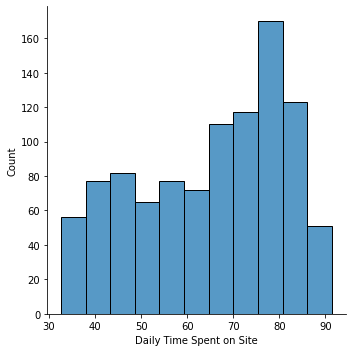

In [10]:
sns.displot(ad["Daily Time Spent on Site"])

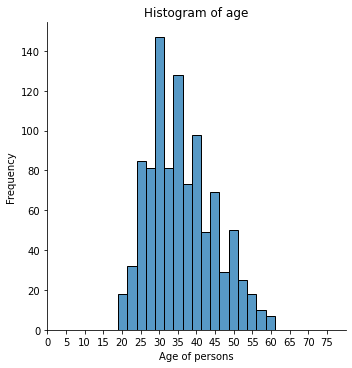

In [15]:
ax = sns.displot(ad["Age"])
_=ax.set(xlim = (10,80), xlabel ='Age of persons', ylabel = 'Frequency ', title = 'Histogram of age',
         xticks = list(range(0,80,5)) )

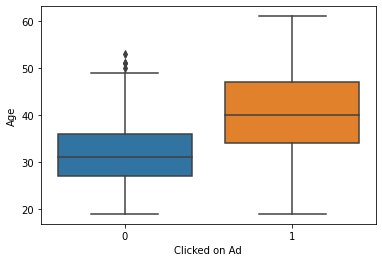

In [17]:
_=sns.boxplot(x= 'Clicked on Ad', y = "Age", data = ad)

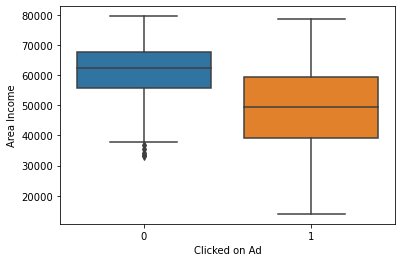

In [18]:
_=sns.boxplot(x= 'Clicked on Ad', y = "Area Income", data = ad)

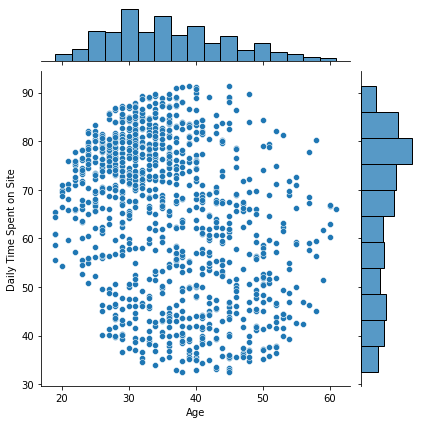

In [20]:
sns.jointplot(x = ad["Age"], y = ad["Daily Time Spent on Site"])

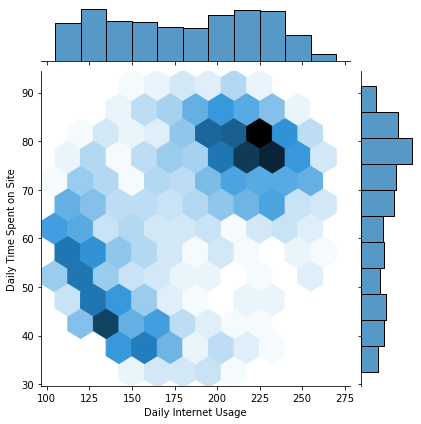

In [22]:
sns.jointplot(x = ad["Daily Internet Usage"], y = ad["Daily Time Spent on Site"], kind = 'hex')

<AxesSubplot:xlabel='Male', ylabel='Clicked on Ad'>

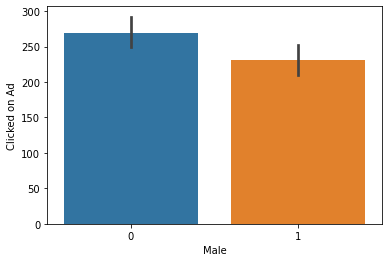

In [23]:
sns.barplot(x = ad["Male"], y=ad["Clicked on Ad"], estimator = np.sum)

<AxesSubplot:xlabel='Male', ylabel='Clicked on Ad'>

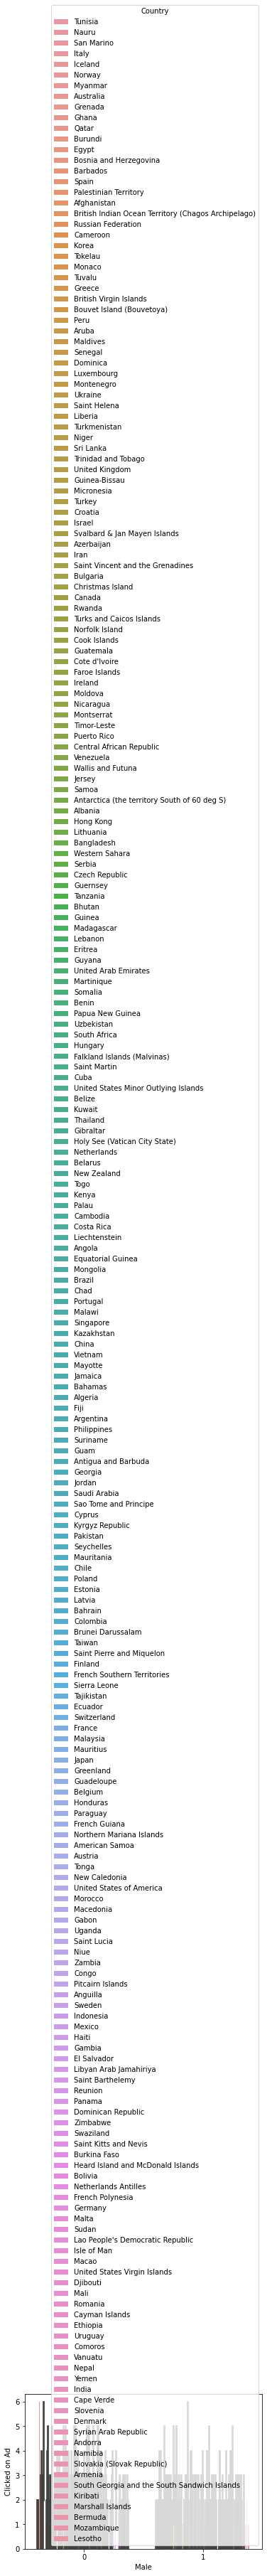

In [27]:
sns.barplot(x = ad["Male"], y=ad["Clicked on Ad"], estimator = np.sum, hue = ad['Country'])

In [32]:
ad['Weekday']=ad.Timestamp.dt.weekday
ad['Hour']=ad.Timestamp.dt.hour
ad['Quarter']=ad.Timestamp.dt.month

In [33]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Weekday,Hour,Quarter
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,6,0,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,1,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,6,20,3
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,6,2,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,4,3,6


In [35]:
ad["Time of day"] = pd.cut(ad.Hour, bins=[-1,6,12,16,20,22,24],
                           labels = ['Early morning', 'Morning', 'Afternoon', 'Evening', 'Late Evening', 'Night'])

In [36]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Weekday,Hour,Quarter,Time of day
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,6,0,3,Early morning
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,1,4,Early morning
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,6,20,3,Evening
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,6,2,1,Early morning
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,4,3,6,Early morning


<AxesSubplot:xlabel='Weekday', ylabel='Time of day'>

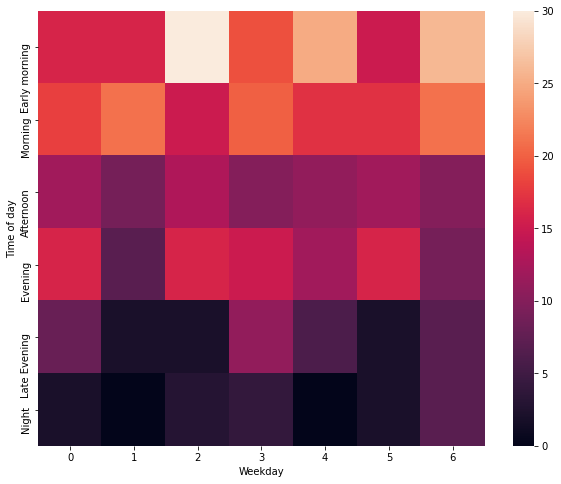

In [44]:
plt.figure(figsize = (10,8))
grouped = ad.groupby(['Time of day', 'Weekday'])
data_when = grouped['Clicked on Ad'].sum().unstack()
sns.heatmap(data_when)

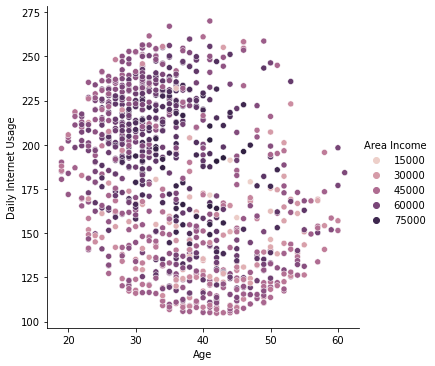

In [47]:
sns.relplot(x="Age", y = "Daily Internet Usage", hue = "Area Income", kind = 'scatter',cmap = 'winter', data=ad)

<Figure size 2160x720 with 0 Axes>

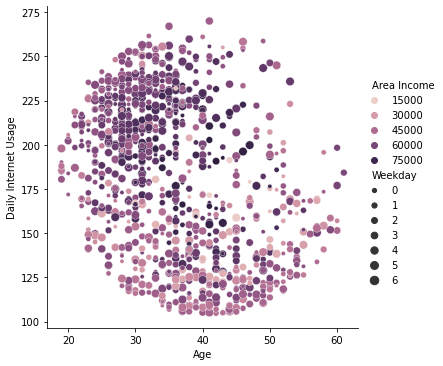

In [51]:
plt.figure(figsize = (30,10))
sns.relplot(x="Age", y = "Daily Internet Usage", hue = "Area Income", kind = 'scatter',cmap = 'winter',size = "Weekday" ,data=ad)